0.009509788888888888 985.5816696428572
492.795589715873
465.063
378    30.28
Name: Coordinate, dtype: float64


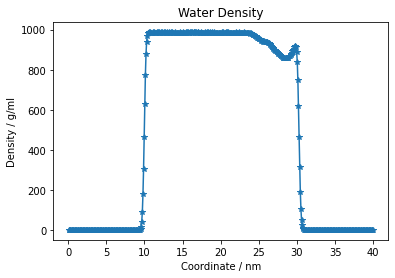

a=9.97233654750094 b=0.44026004799315505


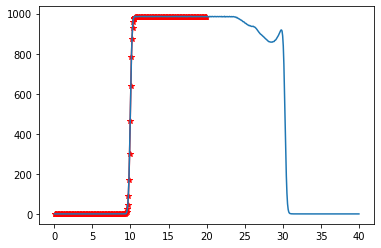

In [20]:
import os
from matplotlib import pyplot
from pylab import genfromtxt 
import statistics
import numpy as np
from numpy import exp, linspace, random
from scipy.fftpack import fft, ifft
import math
from scipy import integrate
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import alphashape
from descartes import PolygonPatch
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Voronoi
from scipy.spatial import ConvexHull, convex_hull_plot_2d

Density = pd.read_csv(r'~/Downloads/alphashapeonedrive/density-water.xvg',skiprows = 24,delim_whitespace = True, 
                      names = ['Coordinate','Density'])

WaterD1 = Density.Density[(Density['Coordinate'] >  1) & (Density['Coordinate'] <  9)]
WaterD2 = Density.Density[(Density['Coordinate'] >  11) & (Density['Coordinate'] <  20)]

        
rD1 = np.mean(WaterD1) 
rD2 = np.mean(WaterD2)
print(rD1,rD2)
interface = 1/2*(rD1+rD2)
print(interface)
#Calculating the water density at the interface

dv = min(Density.Density,key = lambda x:abs(x-interface))
print(dv)
#Finding the closest value in the Density file to the calculated water density value

for k in Density.Density:
        coordinate = Density.Coordinate[Density.Density == dv]
print(coordinate)
#Finding the value of interface coordinate

plt.plot(Density.Coordinate,Density.Density,marker='*')
plt.title('Water Density')
plt.xlabel('Coordinate / nm')
plt.ylabel('Density / g/ml')
plt.show()



def f(u, a, b):
    return 0.5*(rD1+rD2)-0.5*(rD1-rD2)*np.tanh(2.0*(u-a)/b)
u1 = Density.Coordinate[Density['Coordinate'] < 20]
v1 = Density.Density[Density['Coordinate'] < 20]
u = np.array(u1)
v = np.array(v1)
popt,pconv = curve_fit(f,u,v,p0=[0,1],maxfev=3000)
a = popt[0]
b = popt[1]
print('a='+str(a),'b='+str(b))
plt.plot(u,f(u,a,b),marker='*',color='red')
plt.plot(Density.Coordinate,Density.Density)
plt.show()




In [2]:
#WaterD1 = []
#WaterD2 = []
#for i in Density.Coordinate:
#    if (i < 9) & (i > 0):
#        WaterD2.append(Density[i,1])
#    if (i > 11) & (i < 20):
#        WaterD1.append(Density[i,1])

In [3]:
Interface = pd.read_csv(r'~/Downloads/alphashapeonedrive/interface.gro',skiprows = 2,delim_whitespace = True, 
            names = ['Residue','Atom','Number','xaxis','yaxis','zaxis'])

dwater = Interface[(Interface["zaxis"] >  30) & (Interface["Residue"].str.contains( "SOL"))]
print(dwater)
dprotein = Interface[(Interface["zaxis"] >  30) & (~Interface["Residue"].str.contains( "SOL"))]
print(dprotein)

          Residue Atom  Number   xaxis   yaxis   zaxis
100088   20451SOL   OW    89.0  18.279  11.590  30.159
100089   20451SOL  HW1    90.0  18.332  11.657  30.202
100090   20451SOL  HW2    91.0  18.224  11.638  30.097
100091   20451SOL   MW    92.0  18.278  11.605  30.157
100204   20480SOL   OW   205.0   2.586   9.483  30.272
...           ...  ...     ...     ...     ...     ...
1009750  47866SOL  HW2  9751.0   1.356   6.679  30.074
1009956  47918SOL   OW  9957.0  19.416  15.403  30.274
1009957  47918SOL  HW1  9958.0  19.402  15.493  30.304
1009958  47918SOL  HW2  9959.0  19.503  15.404  30.236
1009959  47918SOL   MW  9960.0  19.425  15.415  30.273

[1546 rows x 6 columns]
     Residue  Atom  Number   xaxis   yaxis   zaxis
6890    2VAL  HG11  6891.0  15.200  10.009  30.056
7212   26GLY   HA1  7213.0  15.208  10.954  30.018
7213   26GLY   HA2  7214.0  15.099  10.815  30.038
7215   26GLY     O  7216.0  15.315  10.712  30.072
8369  102TYR   HB1  8370.0  16.421   9.550  30.031
8371  102

In [4]:
waterpoints = dwater.drop(columns = ['Residue','Atom','Number'])
print(waterpoints)
wp = waterpoints.values.tolist()
proteinpoints = dprotein.drop(columns = ['Residue','Atom','Number'])
print(proteinpoints)
pp = proteinpoints.values.tolist()
#Transfer the data type to list, or it cannot be recognized by alpha shape module

          xaxis   yaxis   zaxis
100088   18.279  11.590  30.159
100089   18.332  11.657  30.202
100090   18.224  11.638  30.097
100091   18.278  11.605  30.157
100204    2.586   9.483  30.272
...         ...     ...     ...
1009750   1.356   6.679  30.074
1009956  19.416  15.403  30.274
1009957  19.402  15.493  30.304
1009958  19.503  15.404  30.236
1009959  19.425  15.415  30.273

[1546 rows x 3 columns]
       xaxis   yaxis   zaxis
6890  15.200  10.009  30.056
7212  15.208  10.954  30.018
7213  15.099  10.815  30.038
7215  15.315  10.712  30.072
8369  16.421   9.550  30.031
8371  16.475   9.346  30.046
8372  16.612   9.352  30.075
8373  16.652   9.449  30.052
8374  16.681   9.243  30.125
8375  16.789   9.248  30.124
8376  16.614   9.124  30.158
8377  16.675   9.006  30.206
8378  16.613   8.932  30.207
8379  16.408   9.228  30.081
8380  16.306   9.216  30.047
8381  16.476   9.116  30.137
8382  16.424   9.027  30.168
9700  11.227   8.082  30.063
9701  11.175   8.159  30.124
9702  11.16

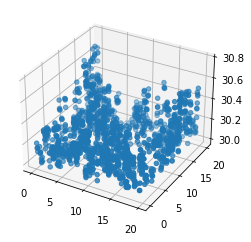

/home/qinkun/.local/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


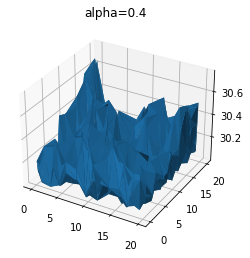

63.75604440316668

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(waterpoints['xaxis'], waterpoints['yaxis'], waterpoints['zaxis'])
plt.show()
alphavalue = 0.4
alpha_shape = alphashape.alphashape(wp, alphavalue)
alpha_shape.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
plt.title('alpha='+str(alphavalue))
plt.show()
alpha_shape.volume


In [6]:
range1= [0.1,0.3,0.4,0.5,0.6,0.7,1.0]
vwater = []
for i in range1:
    alphavalue = i
    print(i)
    alpha_shape = alphashape.alphashape(wp, alphavalue)
    print(alpha_shape.volume)
    vwater.append(alpha_shape.volume)

0.1
117.72121937966668
0.3
77.30012781233336
0.4
63.75604440316668
0.5
53.80772292133334
0.6
45.132340581333324
0.7
34.970546388833355
1.0
12.24064619916668


In [27]:
range1= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.0]
vwater = []
swater = []
for i in range1:
    alphavalue = i
    print(i)
    alpha_shape = alphashape.alphashape(wp, alphavalue)
    print(alpha_shape.volume)
    vwater.append(alpha_shape.volume)
    print(alpha_shape.area)
    swater.append(alpha_shape.area)

0.1
117.72121937966668
788.5505128254313
0.2
90.7221728801667
774.7995440476751
0.3
77.30012781233336
759.9528289405843
0.4
63.75604440316668
755.9509532593258
0.5
53.80772292133334
687.0764522983734
0.6
45.132340581333324
631.7823462249364
0.7
34.970546388833355
588.7716449701114
1.0
12.24064619916668
416.4113811840931


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(dprotein['xaxis'], dprotein['yaxis'], dprotein['zaxis'],color='red')
plt.show()
alphavalue = 0.4
alpha_shape = alphashape.alphashape(pp, alphavalue)
alpha_shape.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces,color='red')
plt.title('alpha='+str(alphavalue))
plt.show()
alpha_shape.volume


In [25]:
range1= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.0]
vprotein = []
sprotein = []
for i in range1:
    alphavalue = i
    print(i)
    alpha_shape = alphashape.alphashape(pp, alphavalue)
    print(alpha_shape.volume)
    vprotein.append(alpha_shape.volume)
    print(alpha_shape.area)
    sprotein.append(alpha_shape.area)

0.1
0.8907881815000025
18.08359770652721
0.2
0.5503848541666653
17.754360023638
0.3
0.4537999628333334
15.807533215636811
0.4
0.02604121433333443
6.16851181422523
0.5
0.03778861766666713
2.242038082333773
0.6
0.03593808533333337
2.2469698093155803
0.7
0.045720408833333205
1.6217878364617464
1.0
0.03901960250000054
1.5921916906888884


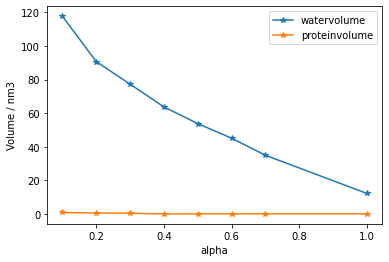

In [30]:
plt.plot(range1,vwater,label='watervolume',marker='*')
plt.plot(range1,vprotein,label='proteinvolume',marker='*')
plt.xlabel('alpha')
plt.ylabel('Volume / nm3')
plt.legend()

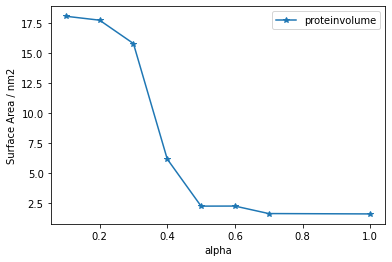

In [32]:
#plt.plot(range1,swater,label='watervolume',marker='*')
plt.plot(range1,sprotein,label='proteinvolume',marker='*')
plt.xlabel('alpha')
plt.ylabel('Surface Area / nm2')
plt.legend()

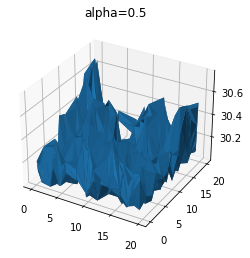

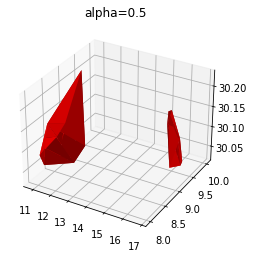

0.03778861766666713

In [82]:
alphavalue = 0.5
alpha_shape = alphashape.alphashape(wp, alphavalue)
alpha_shape.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
plt.title('alpha='+str(alphavalue))
alpha_shape.volume
plt.show()


alphavalue = 0.5
alpha_shape2 = alphashape.alphashape(pp, alphavalue)
alpha_shape2.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape2.vertices), triangles=alpha_shape2.faces,color='red')
plt.title('alpha='+str(alphavalue))
plt.show()
alpha_shape2.volume

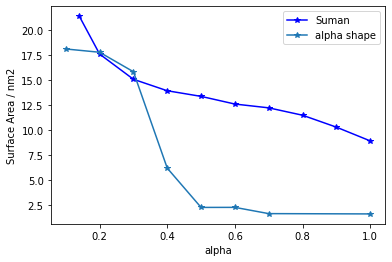

In [38]:
data = [0.14,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
surfacesuman = [21.356,17.575,15.053,13.907,13.344,12.577,12.198,11.460,10.269,8.895]
plt.plot(data,surfacesuman,label='Suman',linestyle='-',color='blue',marker='*')
plt.xlabel('alpha')
plt.ylabel('Surface Area / nm2')
plt.plot(range1,sprotein,label='alpha shape',marker='*')
plt.legend()

In [5]:
Interface = pd.read_csv(r'~/Downloads/phosphateph/p5_8/fcgromos/analysis.gro',skiprows = 2,delim_whitespace = True, 
            names = ['Residue','Atom','Number','xaxis','yaxis','zaxis'])

dwater = Interface[(Interface["zaxis"] >  21) & (Interface["Residue"].str.contains( "SOL"))]
print(dwater)
dprotein = Interface[(Interface["zaxis"] >  21) & (~Interface["Residue"].str.contains( "SOL"))]
print(dprotein)


         Residue Atom  Number   xaxis   yaxis   zaxis
100142  29332SOL   OW   143.0   9.301   2.528  21.231
100143  29332SOL  HW1   144.0   9.237   2.549  21.305
100144  29332SOL  HW2   145.0   9.395   2.541  21.264
100180  29344SOL  HW2   181.0  10.459  12.018  21.055
100272  29375SOL  HW1   273.0   0.686   0.558  21.061
...          ...  ...     ...     ...     ...     ...
209751  65868SOL  HW1  9752.0  13.885   3.345  21.536
209752  65868SOL  HW2  9753.0   0.039   3.292  21.539
209918  65924SOL   OW  9919.0   6.480   8.739  21.498
209919  65924SOL  HW1  9920.0   6.382   8.736  21.480
209920  65924SOL  HW2  9921.0   6.507   8.834  21.518

[334 rows x 6 columns]
     Residue Atom  Number   xaxis  yaxis   zaxis
5792  369THR   CB  5793.0  13.955  9.453  21.092
5793  369THR  OG1  5794.0   0.075  9.424  21.017
5794  369THR  HG1  5795.0   0.159  9.471  21.046
5795  369THR  CG2  5796.0  13.932  9.382  21.228
6926  261LEU   CA  6927.0   2.962  8.279  21.009
...      ...  ...     ...     ... 

In [6]:
waterpoints = dwater.drop(columns = ['Residue','Atom','Number'])
print(waterpoints)
wp = waterpoints.values.tolist()
proteinpoints = dprotein.drop(columns = ['Residue','Atom','Number'])
print(proteinpoints)
pp = proteinpoints.values.tolist()
#Transfer the data type to list, or it cannot be recognized by alpha shape module

         xaxis   yaxis   zaxis
100142   9.301   2.528  21.231
100143   9.237   2.549  21.305
100144   9.395   2.541  21.264
100180  10.459  12.018  21.055
100272   0.686   0.558  21.061
...        ...     ...     ...
209751  13.885   3.345  21.536
209752   0.039   3.292  21.539
209918   6.480   8.739  21.498
209919   6.382   8.736  21.480
209920   6.507   8.834  21.518

[334 rows x 3 columns]
       xaxis  yaxis   zaxis
5792  13.955  9.453  21.092
5793   0.075  9.424  21.017
5794   0.159  9.471  21.046
5795  13.932  9.382  21.228
6926   2.962  8.279  21.009
...      ...    ...     ...
8839   2.092  8.293  21.063
8909   0.394  7.443  21.112
8910   0.450  7.355  21.226
8911   0.408  7.208  21.204
8912   0.601  7.363  21.238

[76 rows x 3 columns]


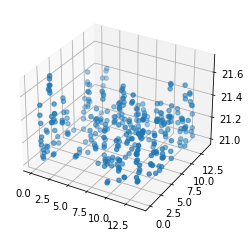

/home/qinkun/.local/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


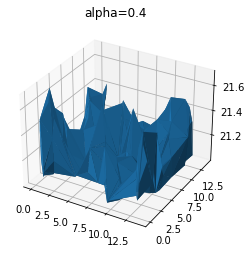

14.004210356333418

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(waterpoints['xaxis'], waterpoints['yaxis'], waterpoints['zaxis'])
plt.show()
alphavalue = 0.4
alpha_shape = alphashape.alphashape(wp, alphavalue)
alpha_shape.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
plt.title('alpha='+str(alphavalue))
plt.show()
alpha_shape.volume

In [16]:
range1= [0.1,0.3,0.4,0.5,0.6,0.7,1.0]
vwater = []
for i in range1:
    alphavalue = i
    print(i)
    alpha_shape = alphashape.alphashape(wp, alphavalue)
    print(alpha_shape.volume)
    vwater.append(alpha_shape.volume)
    print(alpha_shape.area)

0.1
56.510821626333296
376.5273565854168
0.3
24.262178481000024
320.8802866841355
0.4
14.004210356333418
312.1720697084354
0.5
14.725083696166687
269.4281237903569
0.6
9.304973245333354
237.297631334934
0.7
5.972169033833341
197.3776483337879
1.0
0.6521548186666639
95.19602846752592


In [17]:
range1= [0.1,0.3,0.4,0.5,0.6,0.7,1.0]
vwater = []
for i in range1:
    alphavalue = i
    print(i)
    alpha_shape = alphashape.alphashape(pp, alphavalue)
    print(alpha_shape.volume)
    vwater.append(alpha_shape.volume)
    print(alpha_shape.area)

0.1
3.202317990833344
42.07589531319898
0.3
2.0443921996666683
20.90453630780155
0.4
1.5559996616666671
20.97976090734352
0.5
1.2161353679999989
20.922335321560176
0.6
1.0736867951666658
19.509608286682937
0.7
0.5118864140000006
19.225021286750742
1.0
0.4632498028333328
12.28255188003769


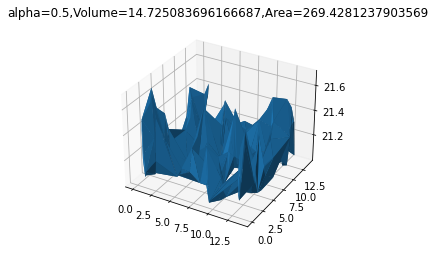

In [12]:
alphavalue = 0.5
alpha_shape = alphashape.alphashape(wp, alphavalue)
alpha_shape.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
plt.title('alpha='+str(alphavalue)+',Volume='+str(alpha_shape.volume)+',Area='+str(alpha_shape.area))
alpha_shape.volume
plt.show()



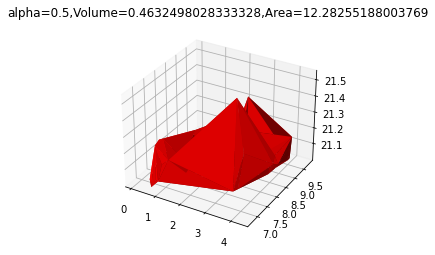

1.2161353679999989

In [15]:

alphavalue = 0.5
alpha_shape2 = alphashape.alphashape(pp, alphavalue)
alpha_shape2.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape2.vertices), triangles=alpha_shape2.faces,color='red')
plt.title('alpha='+str(alphavalue)+',Volume='+str(alpha_shape.volume)+',Area='+str(alpha_shape.area))
plt.show()
alpha_shape2.volume

         xaxis   yaxis   zaxis
100142   9.301   2.528  21.231
100143   9.237   2.549  21.305
100144   9.395   2.541  21.264
100180  10.459  12.018  21.055
100272   0.686   0.558  21.061
...        ...     ...     ...
209751  13.885   3.345  21.536
209752   0.039   3.292  21.539
209918   6.480   8.739  21.498
209919   6.382   8.736  21.480
209920   6.507   8.834  21.518

[334 rows x 3 columns]
       xaxis  yaxis   zaxis
5792  13.955  9.453  21.092
5793   0.075  9.424  21.017
5794   0.159  9.471  21.046
5795  13.932  9.382  21.228
6926   2.962  8.279  21.009
...      ...    ...     ...
8839   2.092  8.293  21.063
8909   0.394  7.443  21.112
8910   0.450  7.355  21.226
8911   0.408  7.208  21.204
8912   0.601  7.363  21.238

[76 rows x 3 columns]
[[ 0.68759718  0.80950528 21.41837027]
 [ 0.40957255  0.67404272 21.37131692]
 [13.52793512  0.36074041 21.55933268]
 ...
 [11.2124217   8.5864499  22.19137245]
 [11.33806168  8.62919409 21.14282249]
 [11.59048301  9.36104316 21.20776374]]


/tmp/ipykernel_510166/3006604464.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


102.70194935249988


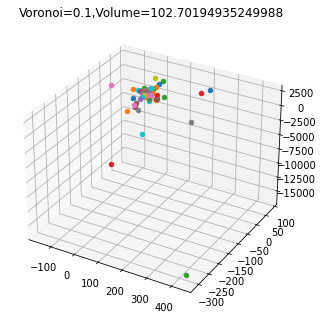

In [28]:
waterpoints = dwater.drop(columns = ['Residue','Atom','Number'])
print(waterpoints)
wp = waterpoints.values.tolist()
proteinpoints = dprotein.drop(columns = ['Residue','Atom','Number'])
print(proteinpoints)
pp = proteinpoints.values.tolist()
#Transfer the data type to list, or it cannot be recognized by alpha shape module
vor = Voronoi(wp)

n = len(vor.vertices)
print(vor.vertices)
# print(vor.regions)

voronoivalue = 0.1
fig =plt.figure()
ax = Axes3D(fig)
for i in range(n-1):
    for j in range(i+1,n):
        # connect vertices of Vornoi region
        if np.linalg.norm(vor.vertices[i]-vor.vertices[j]) <= voronoivalue:
            ax.plot([vor.vertices[i][0], vor.vertices[j][0]], [vor.vertices[i][1], vor.vertices[j][1]], [vor.vertices[i][2], vor.vertices[j][2]]) 
            

#draw vertices of Vornoi region   
for k in range(n):
    ax.scatter(vor.vertices[k][0], vor.vertices[k][1], vor.vertices[k][2])

# draw simplex point
for t in wp:
    ax.scatter(t[0], t[1], t[2])

t = ConvexHull(wp).volume
print(t)
plt.title('Voronoi='+str(voronoivalue)+',Volume='+str(t))
plt.show()

         xaxis   yaxis   zaxis
100142   9.301   2.528  21.231
100143   9.237   2.549  21.305
100144   9.395   2.541  21.264
100180  10.459  12.018  21.055
100272   0.686   0.558  21.061
...        ...     ...     ...
209751  13.885   3.345  21.536
209752   0.039   3.292  21.539
209918   6.480   8.739  21.498
209919   6.382   8.736  21.480
209920   6.507   8.834  21.518

[334 rows x 3 columns]
       xaxis  yaxis   zaxis
5792  13.955  9.453  21.092
5793   0.075  9.424  21.017
5794   0.159  9.471  21.046
5795  13.932  9.382  21.228
6926   2.962  8.279  21.009
...      ...    ...     ...
8839   2.092  8.293  21.063
8909   0.394  7.443  21.112
8910   0.450  7.355  21.226
8911   0.408  7.208  21.204
8912   0.601  7.363  21.238

[76 rows x 3 columns]
[[  30.99015851 -106.19069816  -36.31138914]
 [  29.2780571  -100.84058123    2.43018194]
 [  21.50791848  -67.94630835   92.07459562]
 ...
 [   3.23752882    7.96666817   21.23191394]
 [   3.23902145    7.98161157   21.22873928]
 [   3.24069531

/tmp/ipykernel_510166/1565138072.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


6.3462479420000495


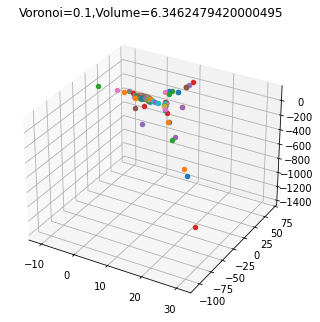

In [29]:
waterpoints = dwater.drop(columns = ['Residue','Atom','Number'])
print(waterpoints)
wp = waterpoints.values.tolist()
proteinpoints = dprotein.drop(columns = ['Residue','Atom','Number'])
print(proteinpoints)
pp = proteinpoints.values.tolist()
#Transfer the data type to list, or it cannot be recognized by alpha shape module
vor = Voronoi(pp)

n = len(vor.vertices)
print(vor.vertices)
# print(vor.regions)

voronoivalue = 0.1
fig =plt.figure()
ax = Axes3D(fig)
for i in range(n-1):
    for j in range(i+1,n):
        # connect vertices of Vornoi region
        if np.linalg.norm(vor.vertices[i]-vor.vertices[j]) <= voronoivalue:
            ax.plot([vor.vertices[i][0], vor.vertices[j][0]], [vor.vertices[i][1], vor.vertices[j][1]], [vor.vertices[i][2], vor.vertices[j][2]]) 
            

#draw vertices of Vornoi region   
for k in range(n):
    ax.scatter(vor.vertices[k][0], vor.vertices[k][1], vor.vertices[k][2])

# draw simplex point
for t in pp:
    ax.scatter(t[0], t[1], t[2])

t = ConvexHull(pp).volume
print(t)
plt.title('Voronoi='+str(voronoivalue)+',Volume='+str(t))
plt.show()